# ODSC West 2022 Tutorial: 
### Objective: Gain intuition into the parameters that define a sinusoisal model
- Kirstin Aschbacher
- Sept 2022

In [2]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

### Let's start by graphing a simple sine wave with the formula:

<h3><i>y = a * sin(x)</i></h3>

- In our case, x will be a time vector reflecting how a series changes over time.
- y will hold the values of that series (e.g., continuous heart rate) at time t
- 'a' refers to the amplitude of the sine wave.

In [3]:
# Create some synthetic data

def build_sine_from_amplitude(time: np.ndarray, amplitude: float) -> np.ndarray:
    """Helper function to build a sine wave, given a 1d numpy array representing time
    and an amplitude value"""
    return amplitude * np.sin(time)

amplitude = 1
time = np.linspace(0, 100, 1000)
series = build_sine_from_amplitude(time, amplitude)

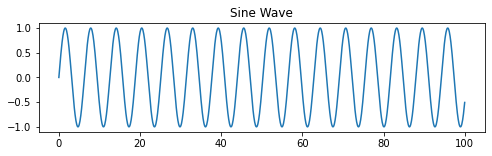

In [4]:
# Plot the sine wave
plt.figure(figsize=(8, 2))
plt.plot(time, series)
plt.title("Sine Wave")
plt.show()

### Let's see what happens if we change the amplitude.

In [5]:
def plot_multiple_sinewaves(time: List[float], params: List[float], series: List[np.ndarray], 
    colors: List[str], linestyles: List[str], title: str
):
    # Create the figure and axis objects
    fig, ax = plt.subplots(1, 1, figsize=(16, 4))

    # Loop to plot 3 sine waves, each with a different amplitude
    n_plots = len(params)
    assert n_plots == len(colors) == len(linestyles)

    for i in range(n_plots):
        ax.plot(time, series[i], color=colors[i], ls=linestyles[i], label=np.round(params[i], 3))

    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Series Values", fontsize=12)
    plt.title(title, fontsize=16)
    plt.legend(loc=(1.01, .4))
    plt.show()

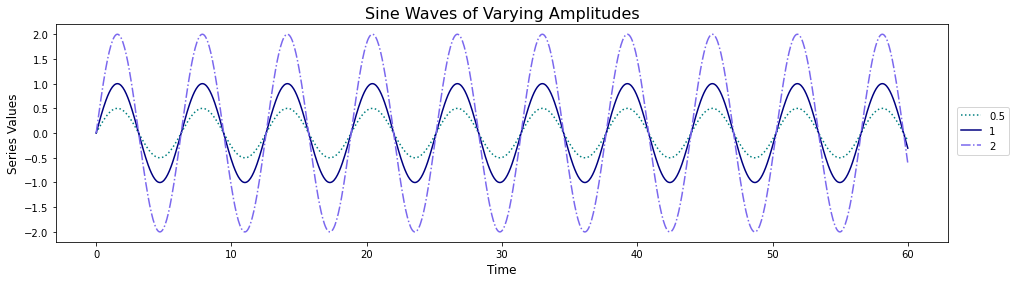

In [6]:
# Configure plot
amplitudes = [.5, 1, 2]
time = np.linspace(0, 60, 1000)
series = [build_sine_from_amplitude(time, val) for val in amplitudes]
fig_params = {
    "time": time,
    "params": amplitudes,
    "series": series,
    "colors": ["teal", "navy", "mediumslateblue"],
    "linestyles": [":", "-", "-."],
    "title": "Sine Waves of Varying Amplitudes"
}
plot_multiple_sinewaves(**fig_params)

### Now let's understand how to modulate omega - the angular frequency
<img src="https://mriquestions.com/uploads/3/4/5/7/34572113/5036452_orig.gif" alt="Image of Angular Frequency"></img>

Frequency in Hz (cycles per sec): 0.07 -> Angular frequency: 0.440
Frequency in Hz (cycles per sec): 0.1 -> Angular frequency: 0.628
Frequency in Hz (cycles per sec): 0.13 -> Angular frequency: 0.817


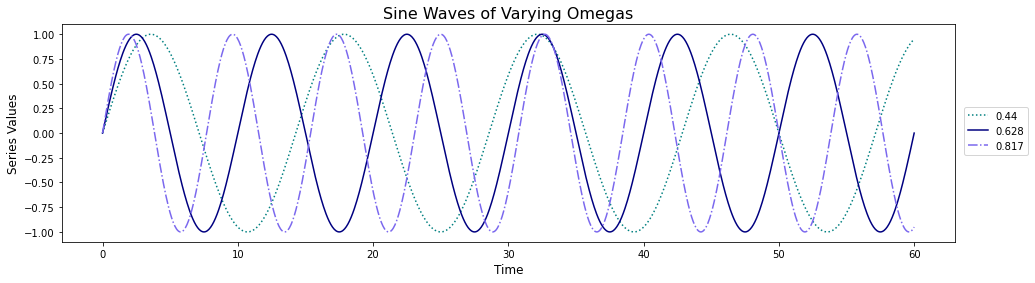

In [28]:
def build_sine(
    time: np.ndarray, 
    amplitude: float, 
    omega: float, 
    yint: float=0, 
    phi: float=np.deg2rad(0)
) -> np.ndarray:
    """Helper function to build a sine wave, given a 1d numpy array representing time
    and an amplitude value"""
    return amplitude * np.sin((time * omega) + phi) + yint

def convert_Hz_to_AF(freq: float) -> float:
    omega = freq * 2 * np.pi
    print(f"Frequency in Hz (cycles per sec): {freq} -> Angular frequency: {omega:.3f}")
    return omega


# Convert frequencies in the hertz to angular frequencies, and generate all sinefit data series
frequencies = [.07, .1, .13]
omegas = [convert_Hz_to_AF(freq) for freq in frequencies]
time = np.linspace(0, 60, 1000)
series = [build_sine(time, amplitude=1, omega=omg) for omg in omegas]

# Configure and plot
fig_params = {
    "time": time,
    "params": omegas,
    "series": series,
    "colors": ["teal", "navy", "mediumslateblue"],
    "linestyles": [":", "-", "-."],
    "title": "Sine Waves of Varying Omegas"
}
plot_multiple_sinewaves(**fig_params)

### Understanding Phi - The Angular Frequency, which shifts the waveform along the x-axis

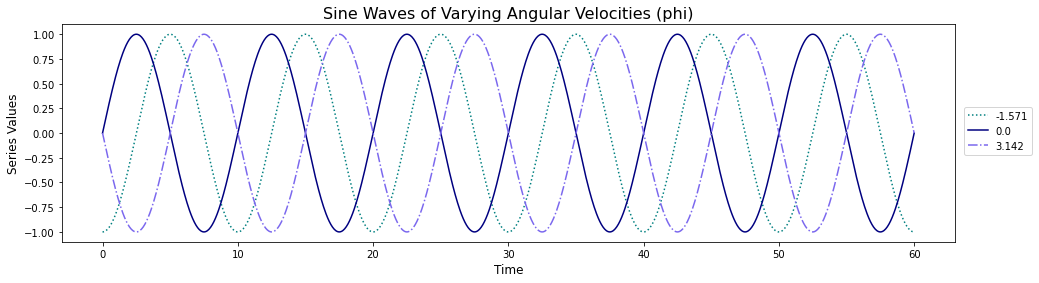

In [29]:
# Specify the offset in the x-axis in degrees ("phase")
phases = [-90, 0, 180]
# Now convert degrees to angular frequency.  phase -> phi.
phis = [np.deg2rad(phase) for phase in phases]
time = np.linspace(0, 60, 1000)
series = [build_sine(time, amplitude=1, omega=.1*2*np.pi, yint=0, phi=phi) for phi in phis]

# Configure & Plot
fig_params = {
    "time": time,
    "params": phis,
    "series": series,
    "colors": ["teal", "navy", "mediumslateblue"],
    "linestyles": [":", "-", "-."],
    "title": "Sine Waves of Varying Angular Velocities (phi)"
}
plot_multiple_sinewaves(**fig_params)

### Finally, the y-intercept term reflects the shift along the y-axis
- When applying a sinefit model to HRV biofeedback data, the y-axis will reflect the average heart rate

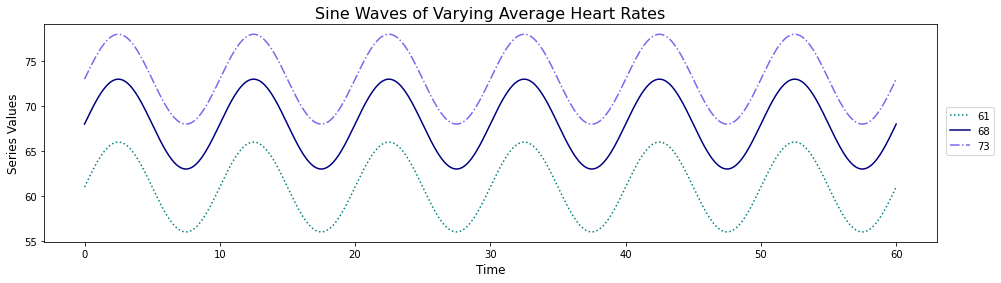

In [30]:
# Specify the offset in the x-axis in degrees ("phase")
heart_rates = [61, 68, 73]
time = np.linspace(0, 60, 1000)
series = [build_sine(time, amplitude=5, omega=.1*2*np.pi, yint=hr, phi=0) for hr in heart_rates]

# Configure & Plot
fig_params = {
    "time": time,
    "params": heart_rates,
    "series": series,
    "colors": ["teal", "navy", "mediumslateblue"],
    "linestyles": [":", "-", "-."],
    "title": "Sine Waves of Varying Average Heart Rates"
}
plot_multiple_sinewaves(**fig_params)

### A Complex Waveform
-- Here's what it looks like when several sine waves with different frequencies, amplitudes, etc are combined

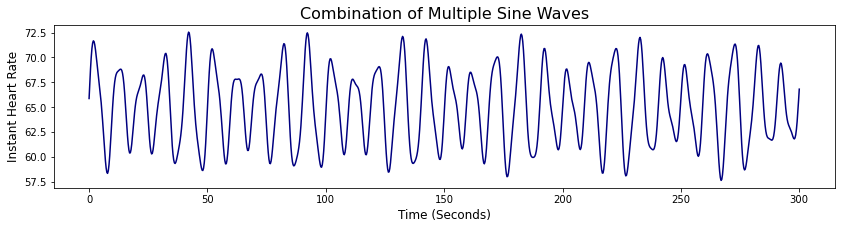

In [31]:
# Build three sinewaves, each with a different amplitude and frequency
time = np.linspace(0, 300, 1000)
sw1 = build_sine(time, amplitude=5, omega=.1*2*np.pi, yint=65, phi=np.deg2rad(10))
sw2 = build_sine(time, amplitude=1.6, omega=.078*2*np.pi, yint=0, phi=0)
sw3 = build_sine(time, amplitude=1, omega=.22*2*np.pi, yint=0, phi=0)

# Combine them with simple addition
series = sw1 + sw2 + sw3

# Plot the combined waveform
plt.figure(figsize=(14, 3))
plt.plot(time, series, color="navy")
plt.title("Combination of Multiple Sine Waves", fontsize=16)
plt.ylabel("Instant Heart Rate", fontsize=12)
plt.xlabel("Time (Seconds)", fontsize=12)
plt.show()